<a href="https://colab.research.google.com/github/TalalBafarat/Obesity-Classification/blob/main/Obesity_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Obesity has been one of the greatest health-related threats of the 21st century. It is estimated that around 2 billion adults are overweight. According to the World Health Organization, obesity has nearly tripled globally since 1975. In fact, most of the world population reside in countries where deaths related to being overweight are more prevalent than hunger-related deaths.

## Problem Statement
While the tendency to being overweight can be attributed to genetics, obesity is mostly dependent on one's life style. This raises an important question. Which factors can be used to predict one's physique? This project attempts to answer this question through data classification.

# Dataset Description

The following data is used to estimate obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels (De-La-Hoz-Correa et al., 2019).<br>


<img src="https://themedicalbiochemistrypage.org/wp-content/uploads/2020/05/obesity-title-image.jpg"/>

## Features
•Gender (Male/Female)<br>
•Age (numeric value)<br>
•Height (numeric value in meters)<br>
•Weight (numeric value in kilograms)<br>
•familiy_history_with_overweight (yes/no)<br>
•FAVC: Frequent consumption of high caloric food (yes/no)<br>
•FCVC: Frequent consumption of vegetables (Never, Sometimes, Frequently)<br>
•NCP: Number of main meals (1-2, 3, > 3)<br>
•CAEC: Consumption of food between meals (no, Sometimes, Frequently, Always)<br>
•SMOKE (yes/no)<br>
•CH2O: Consumption of water daily (< 1 liter, 1-2 liters, > 2 liters)<br>
•SCC: Calories consumption monitoring (yes/no)<br>
•FAF: Physical activity frequency (none, 1 or 2 days per week, 2 or 4 days per week, 4 or 5 days per week)<br> 
•TUE: Time using technology devices (0-2 hours, 3-5 hours, > 5 hours)<br>
•CALC: Consumption of Alcohol (no, Sometimes, Frequently, Always)<br>
•MTRANS: Transportation Used (Public_Transportation, Automobile, Walking, Motorbike, Bike)<br>

## Target
•NObeyesdad (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III)

### Calculation

Obesity level is determined by the Body Mass Index (BMI), which is calculated via the following formula:<br><br>

<img src="https://www.bmi-online.org/images/bmi-formula.png" width="300px"/>

<br><br>
•Underweight Less than 18.5<br>
•Normal 18.5 to 24.9<br>
•Overweight 25.0 to 29.9<br>
•Obesity I 30.0 to 34.9<br>
•Obesity II 35.0 to 39.9<br>
•Obesity III Higher than 40<br>

# Import & Dataset Overview

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
df.tail(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,Female,25.722004,1.628470,107.218949,yes,yes,3.0,3.0,Sometimes,no,2.487070,no,0.067329,0.455823,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,25.765628,1.627839,108.107360,yes,yes,3.0,3.0,Sometimes,no,2.320068,no,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21.016849,1.724268,133.033523,yes,yes,3.0,3.0,Sometimes,no,1.650612,no,1.537639,0.912457,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,21.682367,1.732383,133.043941,yes,yes,3.0,3.0,Sometimes,no,1.610768,no,1.510398,0.931455,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


As demonstrated below, the dataset contains 17 features and 2111 entries 

# Dataset Details

## The number of features and entries

In [ ]:
df.shape

(2111, 17)

## Data Definition Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Statistical Description

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Analysis & Visualization of Features

## Age

How many times each age appears in the column

In [ ]:
df['Age'].value_counts().head(30)#shows how many times each item appears in the column

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
20.000000     48
22.000000     39
17.000000     30
24.000000     18
25.000000     16
27.000000     14
33.000000     13
29.000000     11
16.000000      9
30.000000      8
41.000000      7
38.000000      7
40.000000      6
34.000000      5
31.000000      4
45.000000      3
36.000000      3
39.000000      3
32.000000      3
37.000000      3
35.000000      3
16.306870      2
21.811190      2
25.930376      2
25.783865      2
Name: Age, dtype: int64

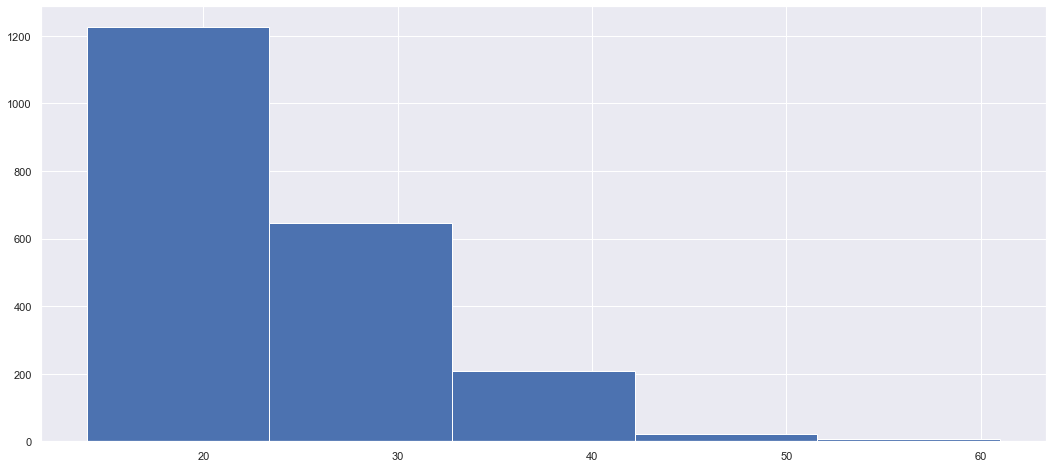

In [ ]:
histAge = df["Age"].hist(bins=5)

## Gender

The dataset contains 1068 Male and 1043 Female participants

In [ ]:
df['Gender'].value_counts()#shows how many times each item appears in the column

Male      1068
Female    1043
Name: Gender, dtype: int64

As shown in the graph, genders are fairly balanced

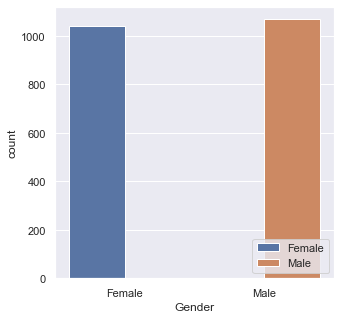

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='Gender',  hue='Gender', data=df).legend(loc='lower right')

## Family History With Overweight

1726 participants have a family history with overweight people, while 385 participants don't

In [ ]:
df['family_history_with_overweight'].value_counts() #shows how many times each item appears in the column

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

The graph shows that the dataset is skewed towards people who have a family history with overweight people

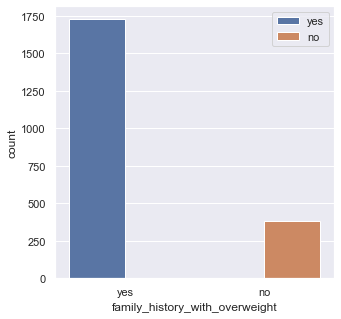

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='family_history_with_overweight',  hue='family_history_with_overweight', data=df).legend(loc='upper right')

## FAVC: Frequent consumption of high caloric food


1866 participants consume foods with high calories, while 245 participants don't

In [ ]:
df['FAVC'].value_counts() #shows how many times each item appears in the column

yes    1866
no      245
Name: FAVC, dtype: int64

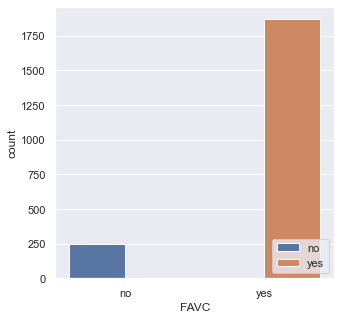

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='FAVC',  hue='FAVC', data=df).legend(loc='lower right')

## FCVC:Frequent consumption of vegetables

The majority of participants are either moderate or frequent consumers of vegetables

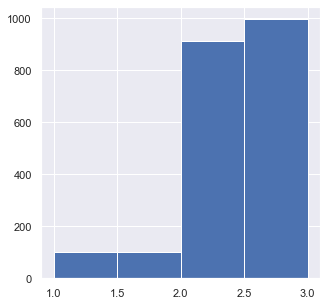

In [ ]:
histFCVC = df["FCVC"].hist(bins=4)

## NCP: Number of main meals 

Most participants consume more than 3 meals a day

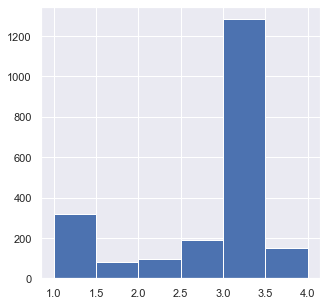

In [ ]:
histNCP = df["NCP"].hist(bins=6)

## CAEC: Consumption of food between meals

In [ ]:
df['CAEC'].value_counts() #shows how many times each item appears in the column

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

The majority of participants are moderate to frequent consumers of food between meals

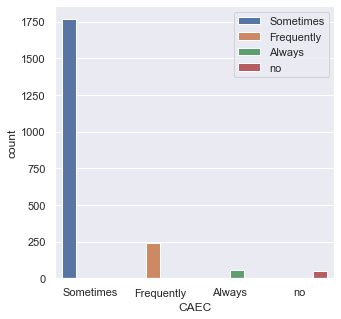

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='CAEC',  hue='CAEC', data=df).legend(loc='upper right')

## Smoke

In [ ]:
df['SMOKE'].value_counts() #shows how many times each item appears in the column

no     2067
yes      44
Name: SMOKE, dtype: int64

Smokers are a minority of the participants, most of which are male

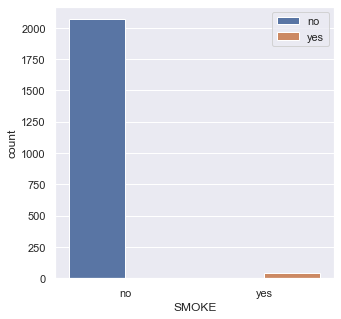

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='SMOKE',  hue='SMOKE', data=df).legend(loc='upper right')

### Smoker Count by Gender

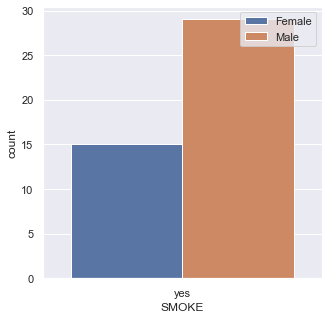

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
smokerCount =sns.countplot(x= "SMOKE", hue='Gender', data=df.loc[df['SMOKE'] =="yes"],).legend(loc='upper right')
# smokerCount.set(ylabel="Smoker Count")
# plt.show()


## CH2O: Consumption of water daily

Most participants consume more than 2 liters of water daily

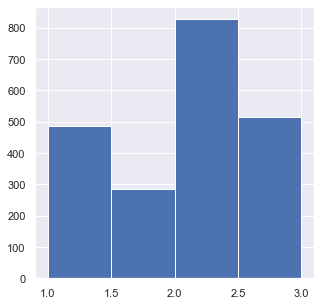

In [ ]:
histCH2O = df["CH2O"].hist(bins=4)

## SCC: Calories consumption monitoring

In [ ]:
df['SCC'].value_counts() #shows how many times each item appears in the column

no     2015
yes      96
Name: SCC, dtype: int64

Most people do not monitor their calories consumption

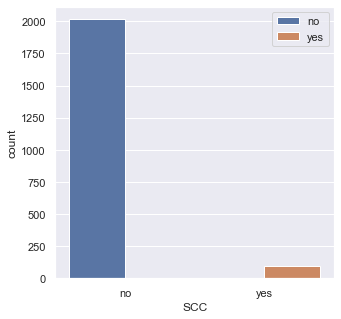

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='SCC',  hue='SCC', data=df).legend(loc='upper right')

### Calories consumption monitoring Used by Gender

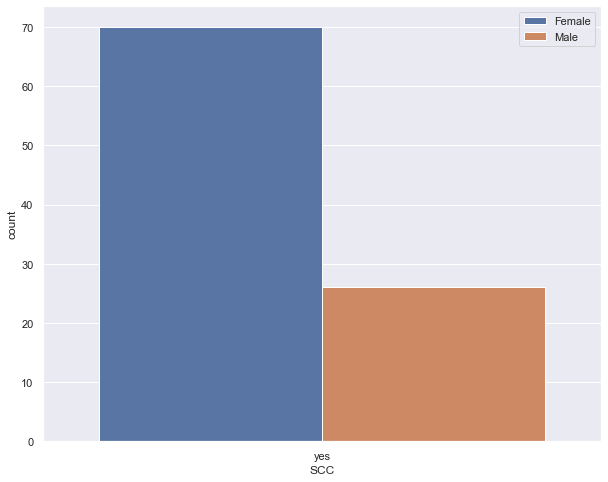

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
SCCCount =sns.countplot(x= "SCC", hue='Gender', data=df.loc[df['SCC'] =="yes"],).legend(loc='upper right')

## FAF: Physical activity frequency 

Most participants don't perform physical activity more than 2 days a week

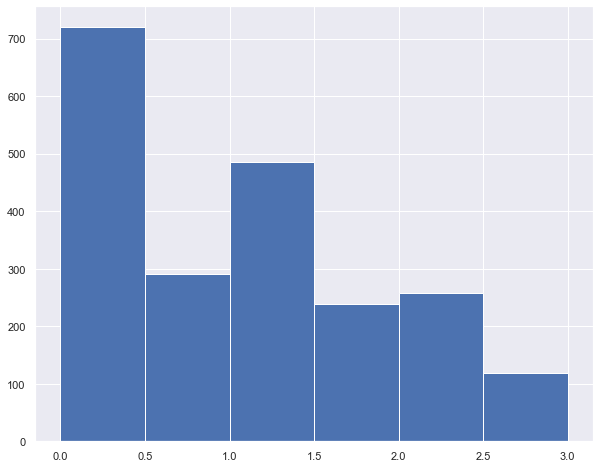

In [ ]:
histFAF = df["FAF"].hist(bins=6)

## TUE: Time using technology devices

A significant portion of the population uses technology devices for less than 2 hours daily, this might change soon

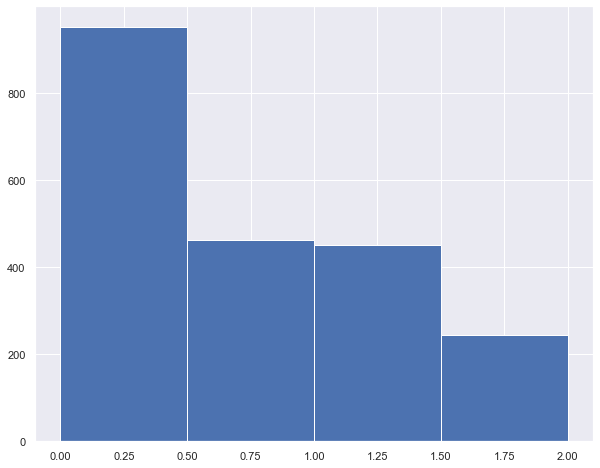

In [ ]:
histTUE = df["TUE"].hist(bins=4)

## CALC: Consumption of Alcohol


In [ ]:
df['CALC'].value_counts()#shows how many times each item appears in the column

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Most participants are alcohol consumers

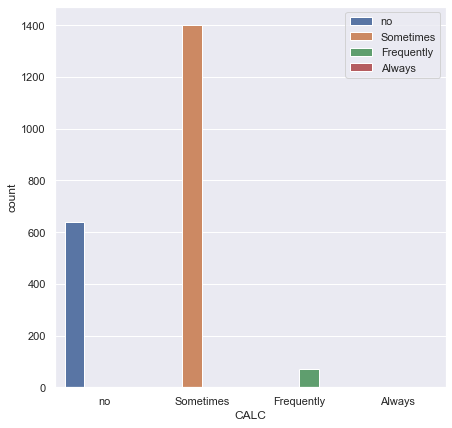

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='CALC',  hue='CALC', data=df).legend(loc='upper right')

### Consumption of Alcohol by Gender

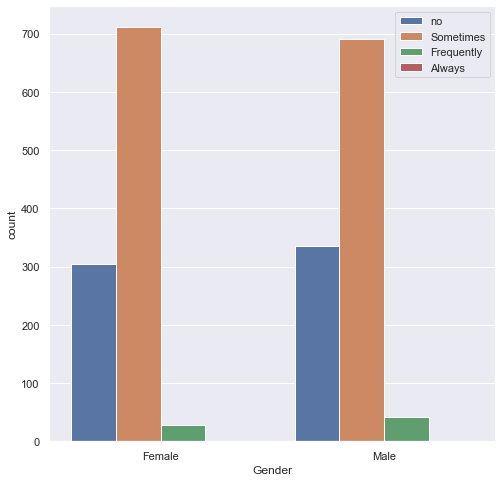

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
CALCCount =sns.countplot(x= "Gender", hue='CALC', data=df,).legend(loc='upper right')

## MTRANS: Transportation Used

In [ ]:
df['MTRANS'].value_counts()#shows how many times each item appears in the colum

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

Most participants either walk or use public tranportation, allowing for more physical activity. Personal transportaion on the other hand isn't as popular

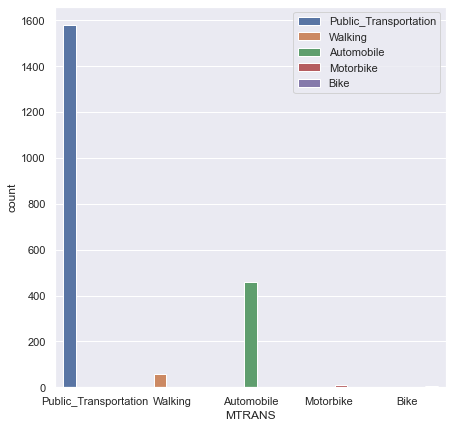

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='MTRANS',  hue='MTRANS', data=df).legend(loc='upper right')

### Most used Trasportation Methods

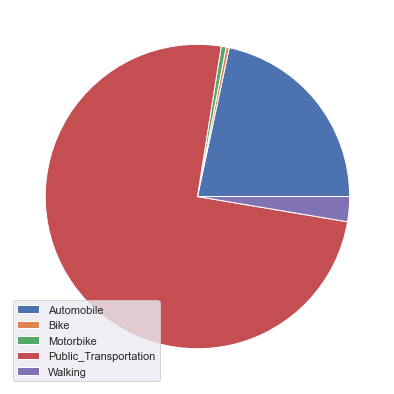

In [ ]:
sums = df["Age"].groupby(df["MTRANS"]).count()
plt.pie(sums, labels=['','','','',""],);
plt.legend(loc=3, labels=sums.index)
plt.show()

### Transportation Used by Gender

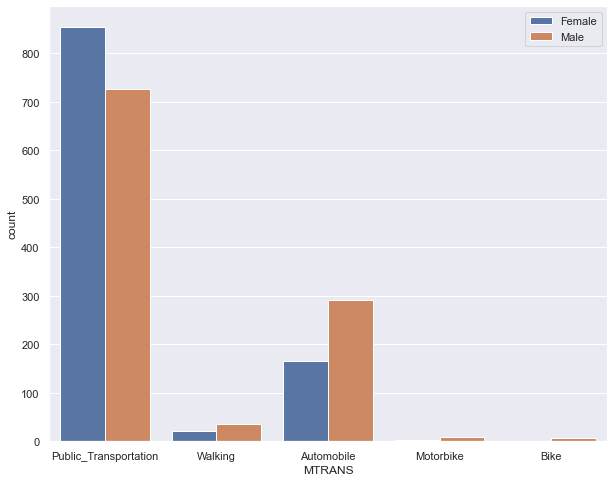

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
MRTANSCount =sns.countplot(x= "MTRANS", hue='Gender', data=df,).legend(loc='upper right')

## NObeyesdad

In [ ]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

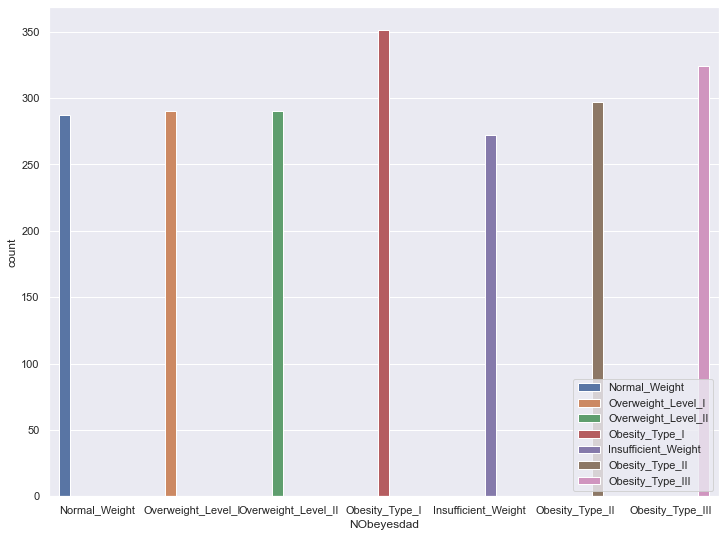

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='NObeyesdad',  hue='NObeyesdad', data=df).legend(loc='lower right')

### Gender Distribution Level by Obesity Level

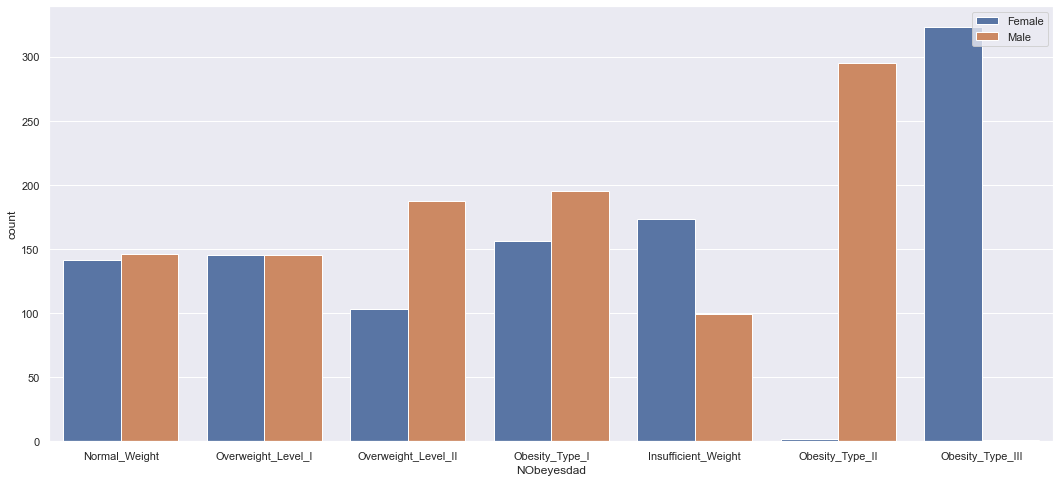

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})
smokerCount =sns.countplot(x= "NObeyesdad", hue='Gender', data=df,).legend(loc='upper right')

### Obesity Level Distribution by Method of Transportation

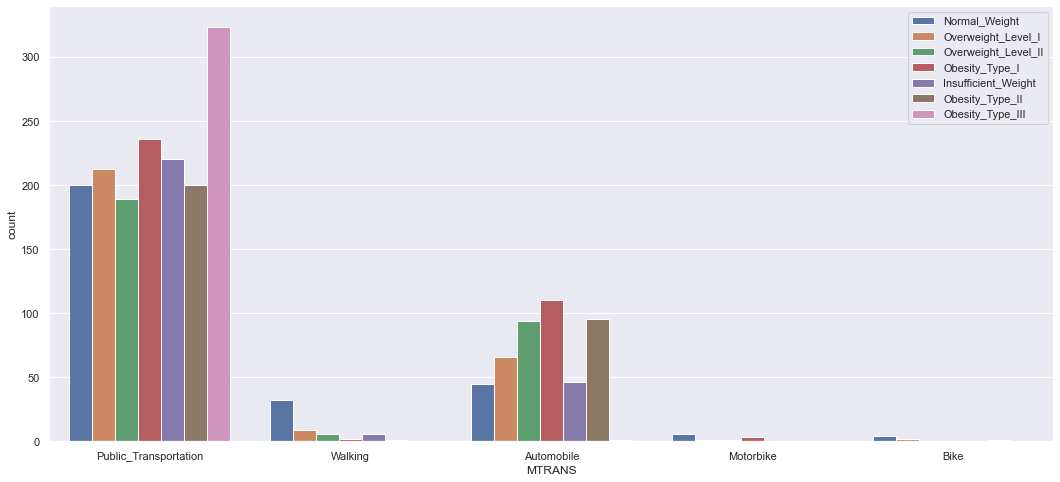

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})
smokerCount =sns.countplot(x= "MTRANS", hue='NObeyesdad', data=df,).legend(loc='upper right')

# Finding Missing Values

As demonstrated below, the dataset does not contain any missing values, however, upon non-graphical EDA, it has been appearent that there are some entries that are incorrectly formatted

In [ ]:
#For missing Values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Preprocessing Analysis

In [ ]:
dfCopy=df.copy()
# Age is rounded to the nearest integer
df['Age']=df['Age'].round(decimals = 0)
# Height is rounded to one decimal place
df['Height']=df['Height'].round(decimals = 1)
# Weight is rounded to one decimal place
df['Weight']=df['Weight'].round(decimals = 1)
# FCVC is rounded to the nearest integer
df['FCVC']=df['FCVC'].round(decimals = 0)
# NCP is rounded to the nearest integer
df['NCP']=df['NCP'].round(decimals = 0)
# CH2O is rounded to the nearest integer
df['CH2O']=df['CH2O'].round(decimals = 0)
# FAF is rounded to the nearest integer
df['FAF']=df['FAF'].round(decimals = 0)
# TUE is rounded to the nearest integer
df['TUE']=df['TUE'].round(decimals = 0)
dfCopy.head(30)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
le = LabelEncoder()

dfCopy["Gender"]=dfCopy["Gender"].map({ 'Male' : 0, 'Female' : 1})
dfCopy["family_history_with_overweight"]=dfCopy["family_history_with_overweight"].map({ 'no' : 0, 'yes' : 1})
dfCopy["FAVC"]=df["FAVC"].map({ 'no' : 0, 'yes' : 1})
dfCopy["CAEC"]=df["CAEC"].map({ 'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
dfCopy["SMOKE"]=dfCopy["SMOKE"].map({ 'no' : 0, 'yes' : 1})
dfCopy["SCC"]=dfCopy["SCC"].map({ 'no' : 0, 'yes' : 1})
dfCopy["CALC"]=df["CALC"].map({ 'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
dfCopy['MTRANS'] =le.fit_transform(dfCopy['MTRANS'])
dfCopy["NObeyesdad"]=df["NObeyesdad"].map({ 'Insufficient_Weight' : 0, 'Normal_Weight' : 1, 'Overweight_Level_I' : 2, 'Overweight_Level_II' : 3, 'Obesity_Type_I' : 4, 'Obesity_Type_II' : 5, 'Obesity_Type_III' : 6})

target_dict={  0 : 'Insufficient_Weight' ,  1:'Normal_Weight' , 2:'Overweight_Level_I' ,3: 'Overweight_Level_II',4: 'Obesity_Type_I' ,5: 'Obesity_Type_II' , 6:'Obesity_Type_III'}
# dfCopy['Gender'] =  le.fit_transform(dfCopy['Gender'])
# dfCopy['family_history_with_overweight'] =  le.fit_transform(dfCopy['family_history_with_overweight'])
# dfCopy['FAVC'] =  le.fit_transform(dfCopy['FAVC'])
# dfCopy['SMOKE'] =  le.fit_transform(dfCopy['SMOKE'])
# dfCopy['SCC'] =  le.fit_transform(dfCopy['SCC'])
# dfCopy['CALC'] =  le.fit_transform(dfCopy['CALC'])
# dfCopy['MTRANS'] =  le.fit_transform(dfCopy['MTRANS'])
# dfCopy['CAEC'] = le.fit_transform(dfCopy['CAEC'])
# dfCopy['NObeyesdad'] =  le.fit_transform(dfCopy['NObeyesdad'])
dfCopy.rename(columns = {'NObeyesdad':"target"}, inplace = True)
dfCopy.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3
5,0,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,0,1
6,1,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,2,1
7,0,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,3,1
8,0,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,3,1
9,0,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,3,1


In [ ]:
target_dict

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Overweight_Level_I',
 3: 'Overweight_Level_II',
 4: 'Obesity_Type_I',
 5: 'Obesity_Type_II',
 6: 'Obesity_Type_III'}

Dropping out features

In [ ]:
dfCopyDropped = dfCopy.drop(['target'], axis=1)
X = dfCopyDropped.copy()
Y=dfCopy['target']
X.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3
5,0,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,0
6,1,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,2
7,0,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,3
8,0,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,3
9,0,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,3


## KNN Accuracy (Before Normalization)

In [ ]:
X_original = X.copy()
X_original_train, X_original_test, y_train, y_test = train_test_split(X_original, Y, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_original_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
preds = knn.predict(X_original_test)

[[38 11  5  1  7  0  0]
 [ 4 51  4  0  0  0  0]
 [ 1  2 53  3  0  1  0]
 [ 0  1  3 56  0  0  0]
 [ 1  1  0  0 50  0  0]
 [ 0  0  0  1  0 59  1]
 [ 0  0  0  0  0  0 69]]


<AxesSubplot:>

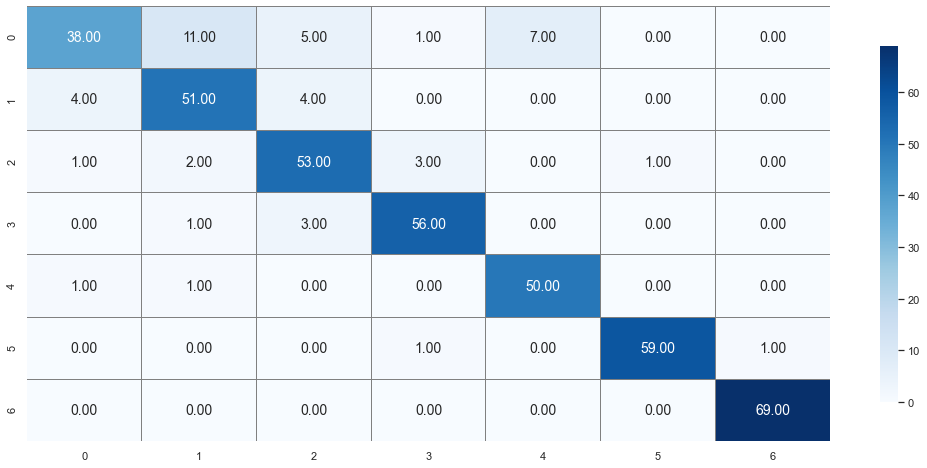

In [ ]:
matrix = confusion_matrix(y_test, preds, labels=Y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        57
           1       0.61      0.86      0.72        44
           2       0.86      0.77      0.82        66
           3       0.88      0.82      0.85        65
           4       0.93      0.92      0.93        61
           5       0.97      0.98      0.98        60
           6       1.00      0.99      0.99        70

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.88       423
weighted avg       0.90      0.89      0.89       423



[0.886 0.875 0.86  0.86  0.848 0.847 0.837 0.829 0.819 0.821 0.818 0.816
 0.806 0.806 0.799 0.795 0.789 0.779 0.778 0.775 0.773 0.764 0.763 0.758
 0.755 0.749 0.742 0.74  0.736 0.735 0.733 0.731 0.73  0.727 0.719 0.718
 0.712 0.707 0.697 0.693 0.688 0.687 0.675 0.674 0.669 0.671 0.668 0.664
 0.663]


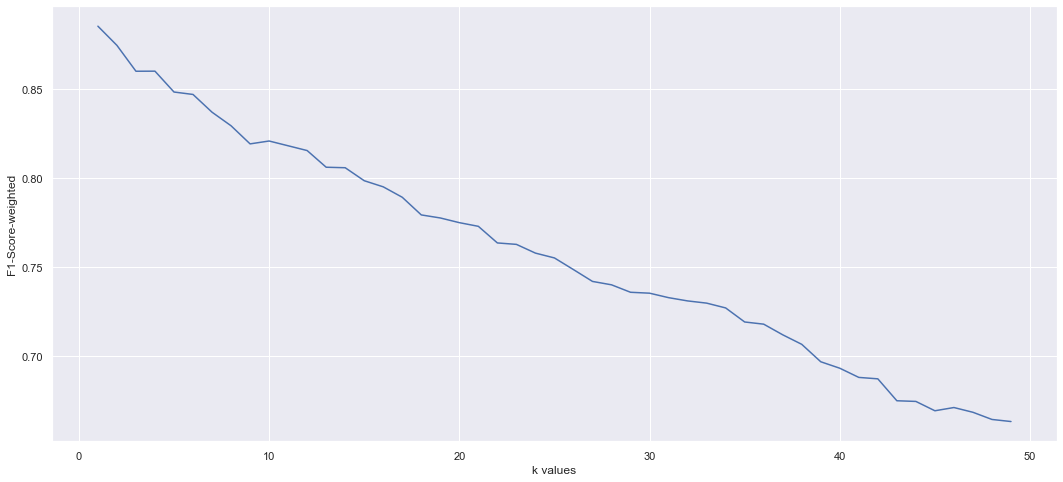

In [ ]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_original_train, y_train)
    scores=cross_val_score(knn, X_original_train, y_train,cv=5, scoring='f1_weighted')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score-weighted')
plt.show()

In [ ]:
optimal_k = k_range[k_scores.index(max(k_scores))]
print("Optimal K: ", optimal_k)

Optimal K:  1


[[38 11  5  1  7  0  0]
 [ 4 51  4  0  0  0  0]
 [ 1  2 53  3  0  1  0]
 [ 0  1  3 56  0  0  0]
 [ 1  1  0  0 50  0  0]
 [ 0  0  0  1  0 59  1]
 [ 0  0  0  0  0  0 69]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.86      0.61      0.72        62
           2       0.77      0.86      0.82        59
           3       0.82      0.88      0.85        60
           4       0.92      0.93      0.93        60
           5       0.98      0.97      0.98        61
           6       0.99      1.00      0.99        69

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.88       423
weighted avg       0.89      0.89      0.89       423



<AxesSubplot:>

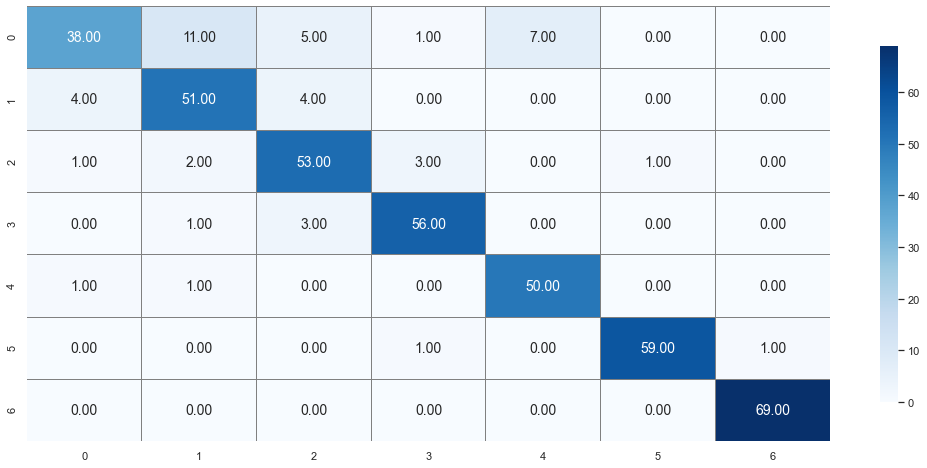

In [ ]:
# Training the model on Optimal K.
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance') 
knn_optimal.fit(X_original_train, y_train)

y_hat = knn_optimal.predict(X_original_test)
matrix = confusion_matrix(y_test, preds, labels=Y.unique(), normalize=None)
print(matrix)
print(classification_report(y_test, y_hat))
sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

## KNN Accuracy (After Normalization)


### Data Normalization

In [ ]:
scaler=StandardScaler()
# scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X = pd.DataFrame(X, columns = dfCopyDropped.columns[:])
X
# X=(X - X.min()) / (X.max() - X.min())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,0.503337
1,1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,0.503337
2,-0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,0.503337
3,-0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,1.296280
4,-0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,0.503337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.011914,-0.525774,0.097045,1.711763,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,-0.456705,-0.218272,0.783135,0.407996,0.521160,0.503337
2107,1.011914,-0.367195,0.502844,1.800914,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,-0.004702,-0.218272,0.389341,-0.096251,0.521160,0.503337
2108,1.011914,-0.281909,0.541672,1.798868,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,0.075361,-0.218272,0.474971,-0.019018,0.521160,0.503337
2109,1.011914,0.007776,0.404927,1.785780,0.472291,0.362349,1.088342,0.404153,-0.300346,-0.145900,1.377801,-0.218272,0.151471,-0.117991,0.521160,0.503337


In [ ]:
X.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,6.529857e-16,-4.823567e-16,-6.476213e-16,-1.786349e-15,-7.570659e-16,8.647906e-15,2.861020e-16,-6.844359e-16,-2.540838e-15,1.326640e-16,3.811888e-16,-3.919361e-15,2.325105e-16,-8.107757e-17,-2.006185e-15,5.255021e-16
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-9.882266e-01,-1.625448e+00,-2.698006e+00,-1.817304e+00,-2.117337e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-2.435125e+00,-1.459003e-01,-1.644905e+00,-2.182720e-01,-1.188039e+00,-1.080625e+00,-1.419172e+00,-1.875493e+00
25%,-9.882266e-01,-6.880656e-01,-7.683883e-01,-8.062914e-01,4.722913e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,-3.003456e-01,-1.459003e-01,-6.905894e-01,-2.182720e-01,-1.041630e+00,-1.080625e+00,-1.419172e+00,5.033367e-01
50%,-9.882266e-01,-2.418974e-01,-1.263207e-02,-1.369510e-01,4.722913e-01,3.623491e-01,-6.283450e-02,4.041527e-01,-3.003456e-01,-1.459003e-01,-1.307326e-02,-2.182720e-01,-1.210937e-02,-5.341135e-02,5.211595e-01,5.033367e-01
75%,1.011914e+00,2.659641e-01,7.159595e-01,7.960531e-01,4.722913e-01,3.623491e-01,1.088342e+00,4.041527e-01,-3.003456e-01,-1.459003e-01,7.659959e-01,-2.182720e-01,7.718565e-01,5.619968e-01,5.211595e-01,5.033367e-01
max,1.011914e+00,5.782584e+00,2.983646e+00,3.300136e+00,4.722913e-01,3.623491e-01,1.088342e+00,1.689740e+00,3.969213e+00,6.853997e+00,1.618759e+00,4.581439e+00,2.339750e+00,2.204618e+00,4.401822e+00,1.296280e+00


### Fetch Target

In [ ]:
y_true = dfCopy['target'].values
y_true

array([1, 1, 1, ..., 6, 6, 6], dtype=int64)

In [ ]:
labels = dfCopy["target"].unique()
labels

array([1, 2, 3, 4, 0, 5, 6], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

In [ ]:
# Use the .predict() method to make predictions from the X_test subset
preds = knn.predict(X_test)

[[ 5  6  3  1  8  0  0]
 [ 2 14  1  2  2  1  1]
 [ 0  5 17  5  0  3  0]
 [ 2  2  0 26  0  3  5]
 [ 0  2  0  0 28  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0 35]]


<AxesSubplot:>

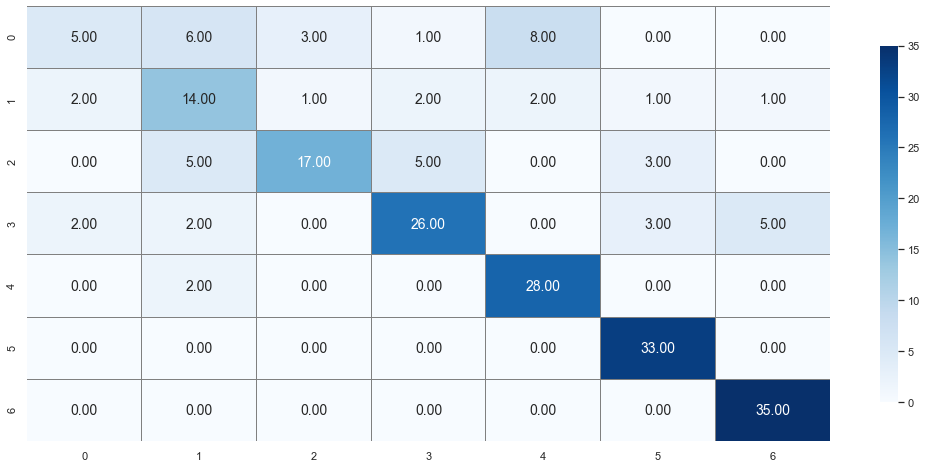

In [ ]:
matrix = confusion_matrix(y_test, preds, labels=Y.unique(), normalize=None)
print(matrix)

sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

Perhaps in your particular instance, one inputs *should* be dramatically more or less important than the other inputs. This explains why normalization reduced accuracy. We can solve this by dropping unimportant features.

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        38
           1       0.22      0.56      0.31         9
           2       0.61      0.48      0.54        29
           3       0.57      0.81      0.67        21
           4       0.68      0.76      0.72        34
           5       1.00      0.82      0.90        40
           6       1.00      0.85      0.92        41

    accuracy                           0.75       212
   macro avg       0.72      0.72      0.70       212
weighted avg       0.81      0.75      0.77       212



## Parameter tuning: optimizing the number of neighbors (k) ...Method 2 by using Cross validation

[0.826 0.814 0.812 0.806 0.808 0.796 0.784 0.772 0.769 0.76  0.757 0.748
 0.74  0.737 0.732 0.728 0.726 0.721 0.712 0.712 0.71  0.712 0.703 0.7
 0.7   0.692 0.687 0.686 0.683 0.681 0.678 0.679 0.674 0.676 0.674 0.674
 0.668 0.666 0.664 0.661 0.663 0.66  0.659 0.657 0.651 0.65  0.643 0.647
 0.644]


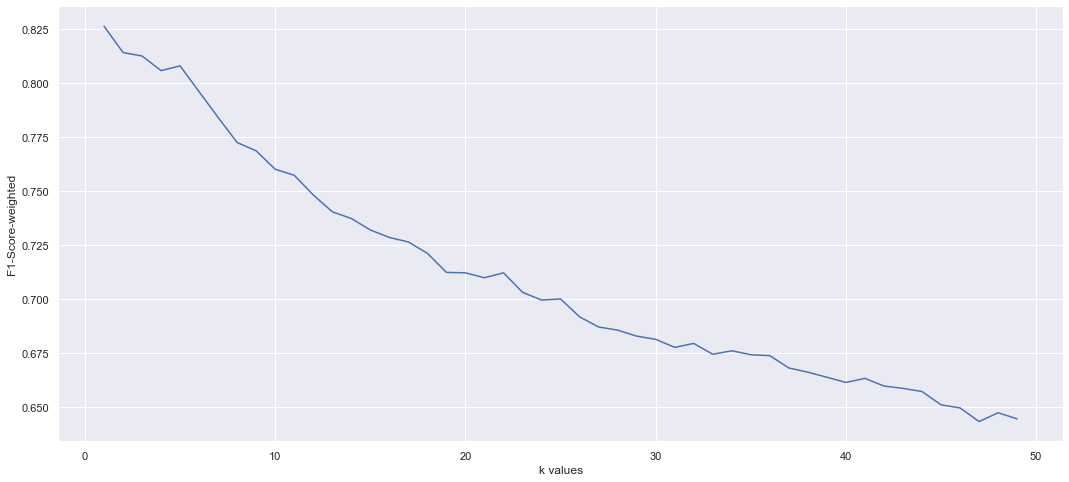

In [ ]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=cross_val_score(knn, X_train, y_train,cv=5, scoring='f1_weighted')  # or ‘f1_micro’, ‘f1_weighted’
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
                                                                          
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('F1-Score-weighted')
plt.show()

In [ ]:
optimal_k = k_range[k_scores.index(max(k_scores))]
print("Optimal K: ", optimal_k)

Optimal K:  1


[[ 5  6  3  1  8  0  0]
 [ 2 14  1  2  2  1  1]
 [ 0  5 17  5  0  3  0]
 [ 2  2  0 26  0  3  5]
 [ 0  2  0  0 28  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.64      0.39      0.49        23
           2       0.71      0.87      0.78        23
           3       0.87      0.90      0.89        30
           4       0.94      0.89      0.92        38
           5       0.97      1.00      0.99        33
           6       0.97      1.00      0.99        35

    accuracy                           0.87       212
   macro avg       0.84      0.85      0.84       212
weighted avg       0.86      0.87      0.86       212



<AxesSubplot:>

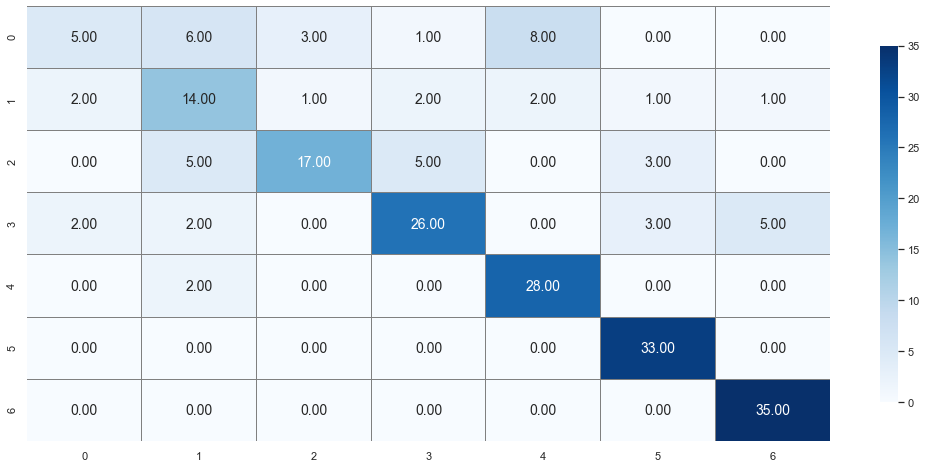

In [ ]:
# Training the model on Optimal K.
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance') 
knn_optimal.fit(X_train, y_train)

y_hat = knn_optimal.predict(X_test)
matrix = confusion_matrix(y_test, preds, labels=Y.unique(), normalize=None)
print(matrix)
print(classification_report(y_test, y_hat))
sns.heatmap(matrix, annot=True,  
                  annot_kws={"size": 14},
                  fmt='.2f', cmap="Blues", cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

# Testing KNN, Decision Tree, Random Forest, and SVC


## Dropping Features

In [ ]:
dfCopyDropped2 = dfCopyDropped.drop(['Gender', 'family_history_with_overweight', 'FCVC', 'NCP', 'CALC', 'MTRANS'], axis=1)
dfCopyDropped2.to_csv("ObesityDataSet_processed.csv")
X = dfCopyDropped2.copy()
# X=X.drop(['Age'], axis=1)
Y=dfCopy['target']
X.head(10)

,Age,Height,Weight,FAVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE
0,21.0,1.62,64.0,0,1,0,2.0,0,0.0,1.0
1,21.0,1.52,56.0,0,1,1,3.0,1,3.0,0.0
2,23.0,1.80,77.0,0,1,0,2.0,0,2.0,1.0
3,27.0,1.80,87.0,0,1,0,2.0,0,2.0,0.0
4,22.0,1.78,89.8,0,1,0,2.0,0,0.0,0.0
5,29.0,1.62,53.0,1,1,0,2.0,0,0.0,0.0
6,23.0,1.50,55.0,1,1,0,2.0,0,1.0,0.0
7,22.0,1.64,53.0,0,1,0,2.0,0,3.0,0.0
8,24.0,1.78,64.0,1,1,0,2.0,0,1.0,1.0
9,22.0,1.72,68.0,1,1,0,2.0,0,1.0,1.0


## Train Test Split

In [ ]:
X_original2 = X.copy()
X_train, X_test, y_train, y_test = train_test_split(X_original2, Y, test_size=0.1)

## Training Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")  

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.98585
Accuracy w/Scaled Data (ss): 0.98113
Accuracy w/Scaled Data (mm): 0.98113

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      0.96      0.94        25
           2       0.95      0.91      0.93        22
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        29

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.9717
Accuracy w/Scaled Data (ss): 0.

## Random Forest Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Accuracy Score = 0.98
{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 120}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      0.92      0.94        25
           2       0.88      0.95      0.91        22
           3       1.00      1.00      1.00        29
           4       1.00      0.97      0.99        34
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        29

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



 ## KNN Hyperparameter Tuning

In [ ]:
#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.91
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.80      0.48      0.60        25
           2       0.77      0.91      0.83        22
           3       0.87      0.93      0.90        29
           4       0.92      0.97      0.94        34
           5       1.00      0.98      0.99        41
           6       1.00      1.00      1.00        29

    accuracy                           0.91       212
   macro avg       0.89      0.89      0.88       212
weighted avg       0.90      0.91      0.90       212



# Conclusion
For the given dataset, the two most important features seem to be Weight and Height While features such as gender, family history, alcohol consumption, number of main meals, consumption of high caloric food, and methods of transportation can be ignored without much of an effect on the results. The best model seems to be Random Forest where the data goes through many iterations of random selection to come up with the best result, followed by the Decision Tree which is similar but is more prone to overfitting.

# Thank You!
For any inquiry or comments, email us at tbafarat@gmail.com<br>
Written report: https://docs.google.com/document/d/1e7iKUvYHTyDRc2wV034HRh9UE2rtujYJ/edit?usp=sharing&ouid=102725914137395760196&rtpof=true&sd=true
### References
Mendoza ,F & Manotas, A (Aug 2, 2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico
Retrieved from https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub<br>

UCI (Aug 27, 2019). Estimation of obesity levels based on eating habits and physical condition Data Set. The Economist. 
Retrieved from https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+<br>

Word Health Organization. (Jun 9, 2021). Obesity and overweight. Retrieved from https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight#:~:text=Key%20facts,over%20650%20million%20were%20obese